In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
import matplotlib.pyplot as plt
import numpy as np
from src.data_loading.simple_loader import load_processed_berkeley_earth, load_processed_era5
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [ ]:
be = load_processed_berkeley_earth()
era5 = load_processed_era5()

/main/Users/devin/Documents/temperature-comparison/config/config.yaml
Loading processed Berkeley Earth from: /home/devin/Documents/temperature-comparison-data/processed/BE/berkeley_earth_preprocessed.nc
/main/Users/devin/Documents/temperature-comparison/config/config.yaml
Loading processed ERA5 from: /home/devin/Documents/temperature-comparison-data/processed/ERA5/era5_preprocessed.nc
Berkeley Earth shape: Frozen({'longitude': 1440, 'latitude': 720, 'time': 2104, 'month_number': 12})
ERA5 shape: Frozen({'time': 2104, 'latitude': 720, 'longitude': 1440, 'month': 12})


In [28]:
# calculate global averages with area weighting and plot
weights = be.areal_weight
be_global = be.temperature.weighted(weights).mean(('latitude','longitude'))
er_global = era5.anomalies.weighted(weights).mean(('latitude','longitude'))

Most recent value of ERA5: 1.28 °C on 2025-04-17T00:00:00.000000000
Most recent value of Berkeley Earth: 1.34 °C on 2025-04-17T00:00:00.000000000


Text(0.5, 1.0, 'Global Averages')

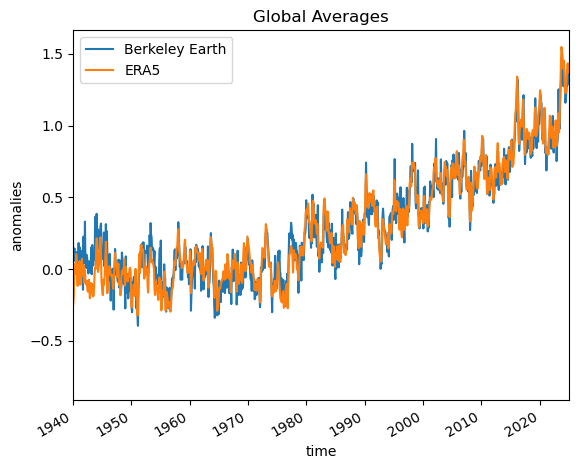

In [ ]:
print(f"Most recent value of ERA5: {er_global[-2].values:.2f} °C on {er_global.time[-1].values}")
print(f"Most recent value of Berkeley Earth: {be_global[-2].values:.2f} °C on {be_global.time[-1].values}")

be_global.plot(label='Berkeley Earth')
er_global.plot(label='ERA5')
plt.xlim(np.datetime64('1940-01-01'), np.datetime64('2025-01-01'))
plt.legend()
plt.title('Global Averages')

AttributeError: 'Axes' object has no attribute 'coastlines'

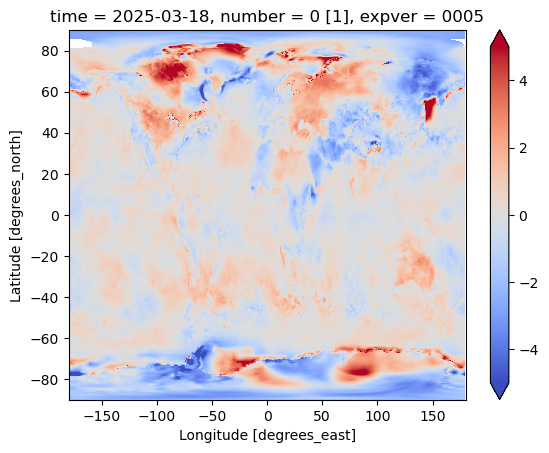

In [ ]:
# plot difference of last time slice of both datasets
difference = be.temperature[-2] - era5.anomalies[-2]
difference.plot(vmin=-5, vmax=5, cmap='coolwarm')
# add coastlines

plt.title('Berkeley Earth - ERA5 on ' + str(be_global.time[-2].values))


In [1]:
be.temperature[-2].plot()
er.anomalies[-2].plot()

NameError: name 'be' is not defined

In [9]:
import xarray as xr
path = '~/Documents/temperature-comparison-data/Raw/ERA5/ERA5_TMAX_TMIN.nc'
max_min = xr.open_dataset(path)
max_min.lat

<xarray.DataArray 'lat' (lat: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ])
Coordinates:
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0